<a href="https://colab.research.google.com/github/Shubham2376G/trainingIBM/blob/main/text_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import textwrap
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-05-01 15:14:23--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-05-01 15:14:23 ERROR 403: Forbidden.



In [ ]:
df = pd.read_csv('bbc_text_cls.csv')

In [ ]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


<Axes: >

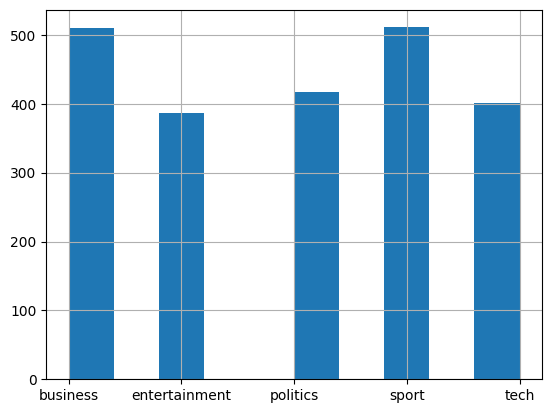

In [ ]:
df["labels"].hist()

In [ ]:
df["text"][1]

'Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions u

In [ ]:
doc = df[df.labels == 'business']['text'].sample(random_state=42,n=1)

In [ ]:
doc

480    Christmas sales worst since 1981\n\nUK retail ...
Name: text, dtype: object

In [ ]:
l1=np.array([1,2,3,0])

In [ ]:
l2=l1[l1!=0]

In [ ]:
l2.mean()

2.0

In [ ]:
sents = nltk.sent_tokenize(doc.iloc[0].split("\n", 1)[1])

In [ ]:
sents

['\nUK retail sales fell in December, failing to meet expectations and making it by some counts the worst Christmas since 1981.',
 'Retail sales dropped by 1% on the month in December, after a 0.6% rise in November, the Office for National Statistics (ONS) said.',
 'The ONS revised the annual 2004 rate of growth down from the 5.9% estimated in November to 3.2%.',
 'A number of retailers have already reported poor figures for December.',
 'Clothing retailers and non-specialist stores were the worst hit with only internet retailers showing any significant growth, according to the ONS.',
 'The last time retailers endured a tougher Christmas was 23 years previously, when sales plunged 1.7%.',
 'The ONS echoed an earlier caution from Bank of England governor Mervyn King not to read too much into the poor December figures.',
 'Some analysts put a positive gloss on the figures, pointing out that the non-seasonally-adjusted figures showed a performance comparable with 2003.',
 'The November-De

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
X=vectorizer.fit_transform(sents)

In [ ]:
X

<17x199 sparse matrix of type '<class 'numpy.float64'>'
	with 319 stored elements in Compressed Sparse Row format>

In [ ]:
def score_fn(text):
  text=text[text !=0]
  return text.mean()

In [ ]:
scores=[]
for i in range(len(sents)):
  scores.append(score_fn(X[i]))

In [ ]:
len(scores)

17

In [ ]:
scoresnp=np.array(scores)

In [ ]:
scoresnp

array([0.21251007, 0.22974029, 0.26235161, 0.30959164, 0.22035317,
       0.26016286, 0.21002977, 0.22685856, 0.21582156, 0.20984796,
       0.28317987, 0.22947838, 0.2512168 , 0.21500319, 0.20877361,
       0.17128742, 0.23167242])

In [ ]:
ranks=np.argsort(-scoresnp)
ranks

array([ 3, 10,  2,  5, 12, 16,  1, 11,  7,  4,  8, 13,  0,  6,  9, 14, 15])

In [ ]:
ranks=ranks.astype(int)

In [ ]:
sents=pd.Series(sents)

In [ ]:
#only works with pandas series

In [ ]:
print("ranks are",sents[ranks[0:5]])

ranks are 3     A number of retailers have already reported po...
10    However, reports from some High Street retaile...
2     The ONS revised the annual 2004 rate of growth...
5     The last time retailers endured a tougher Chri...
12    And a British Retail Consortium survey found t...
dtype: object
